In [10]:
# data library
import pandas as pd
import numpy as np 

# plotting library
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [13]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

In [2]:
data = pd.read_csv("/Users/fqx/Dropbox/天坑企划/拉力赛/推荐数据2.csv")
print(data.size)
data = data.drop(['作品编号'], axis=1)
data.head()

980


,作者,组别,赛段,上赛段推荐票,编辑推荐,在售作品
0,大姑娘浪,言情,1,4846,0,2
1,周板娘,言情,1,3217,0,1
2,坡西米,言情,1,3204,0,5
3,陆雾,言情,1,1647,0,5
4,小格,言情,1,1039,0,8


In [3]:
print(data.columns)

Index(['作者', '组别', '赛段', '上赛段推荐票', '编辑推荐', '在售作品'], dtype='object')


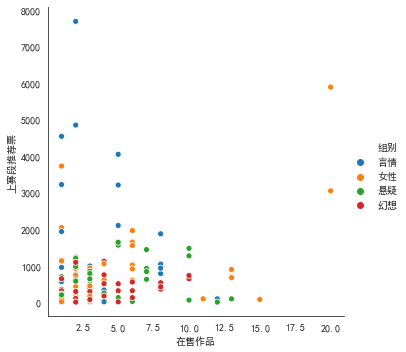

In [14]:
sns.relplot(x="在售作品", y="上赛段推荐票", hue="组别", data=data)

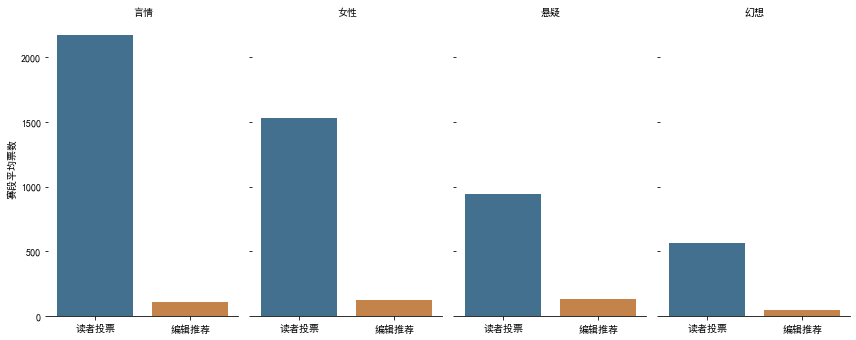

In [5]:
plot = sns.catplot(x="编辑推荐", y="上赛段推荐票", col="组别", col_wrap=4,
                 data=data,
                 kind="bar", saturation=.5, ci=None, aspect=.6)

(plot.set_axis_labels("", "赛段平均票数")
   .set_xticklabels(["读者投票", "编辑推荐"])
   .set_titles("{col_name}")
   .despine(left=True))

# plot.savefig('/Users/fqx/Dropbox/天坑企划/拉力赛/group.png',dpi=150) 

In [6]:
data.groupby(['组别', '编辑推荐','赛段']).mean()

上赛段推荐票  在售作品
组别 编辑推荐 赛段              
女性 0    1   1169.8   7.2
        2   1894.1   6.2
   1    1    101.3   3.7
        2    172.8   1.8
幻想 0    1    511.0   4.4
        2    621.7   5.3
   1    1     54.3   2.1
        2     36.2   2.8
悬疑 0    1    861.2   4.4
        2   1029.2   4.3
   1    1    140.3   4.3
        2    104.8   5.4
言情 0    1   1721.7   3.7
        2   2617.8   3.5
   1    1    140.5   1.9
        2     45.0   4.2

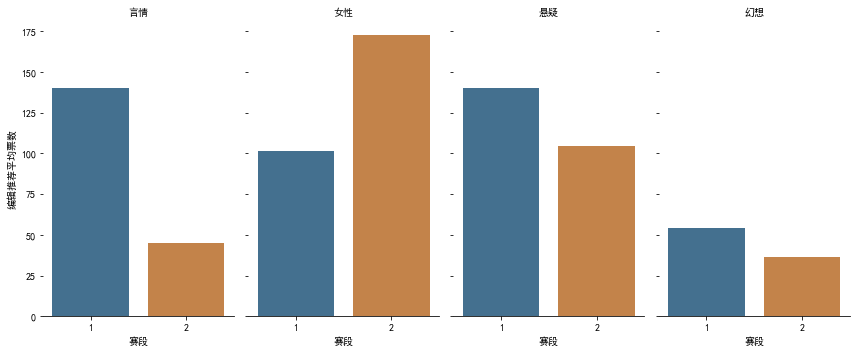

In [7]:
bj = data[data['编辑推荐']==1]
plot2 = sns.catplot(x="赛段", y="上赛段推荐票", col="组别", col_wrap=4,
                 data=bj,
                 kind="bar", saturation=.5, ci=None, aspect=.6)

(plot2.set_axis_labels("赛段", "编辑推荐平均票数")
   .set_xticklabels(["1", "2"])
   .set_titles("{col_name}")
   .despine(left=True))

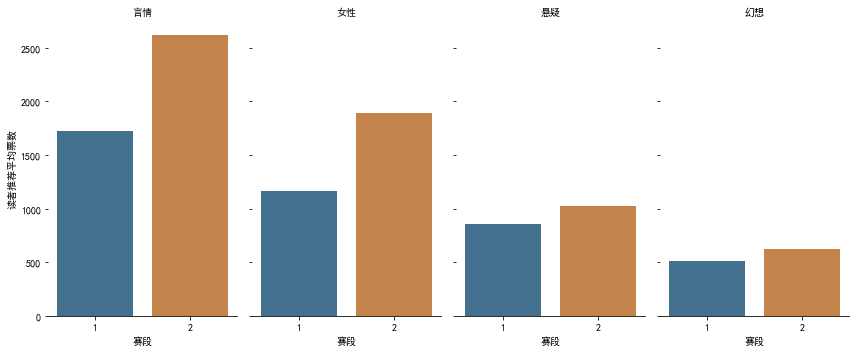

In [8]:
dz = data[data['编辑推荐']==0]
plot3 = sns.catplot(x="赛段", y="上赛段推荐票", col="组别", col_wrap=4,
                 data=dz,
                 kind="bar", saturation=.5, ci=None, aspect=.6)

(plot3.set_axis_labels("赛段", "读者推荐平均票数")
   .set_xticklabels(["1", "2"])
   .set_titles("{col_name}")
   .despine(left=True))

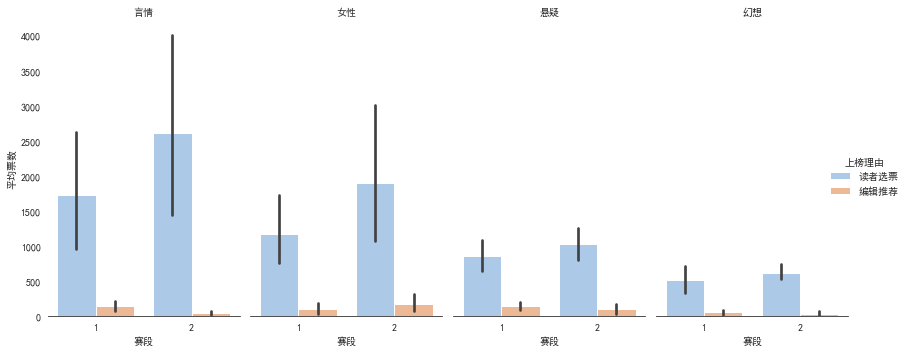

In [21]:
plot4 = sns.catplot(x="赛段", y="上赛段推荐票", hue="编辑推荐",col="组别",
                    col_wrap=4, data=data, kind="bar", ci=95, 
                    saturation=.7, aspect=.6, palette='pastel')

#ci confidence interval
(plot4.set_axis_labels("赛段", "平均票数")
   .set_xticklabels(["1", "2"])
   .set_titles("{col_name}")
   .despine(left=True))

# title
new_title = '上榜理由'
plot4._legend.set_title(new_title)
# replace labels
new_labels = ['读者选票', '编辑推荐']
for t, l in zip(plot4._legend.texts, new_labels): t.set_text(l)

# plot4.savefig('/Users/fqx/Dropbox/天坑企划/拉力赛/推荐.png',dpi=150) 